In [ ]:
# Importing the libraries
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
weather_df = pd.read_csv('weatherAUS.csv')

In [ ]:
# Pre-processing the data

# Handle missing data
# Drop rows with missing values
weather_df.dropna(inplace=True)

# Dealing with the unnecessary data
# checking for any unneeded column ie. null values == number of total observations
weather_df.isnull().sum()

# Separate numeric columns
numeric_data = weather_df.select_dtypes(include='number')

# Separate non-numeric (categorical) columns
non_numeric_data = weather_df.select_dtypes(exclude='number')

# Print or inspect the separated data
print("Numeric Data:")
print(numeric_data.head())

print("\nNon-Numeric Data:")
print(non_numeric_data.head())

Numeric Data:
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0      5.1     14.3       0.0          1.8       8.9           30.0   
2     19.7     26.2       0.0          7.2       7.2           41.0   
3     16.6     28.0       0.0          9.0      11.3           54.0   
5     15.7     27.3       0.0         11.2       5.6           65.0   
6      9.8     23.9       0.0          4.4      10.5           35.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           7.0           6.0         65.0         47.0       1023.1   
2          19.0          31.0         48.0         50.0       1020.9   
3          28.0          33.0         50.0         41.0       1018.3   
5          11.0          13.0         60.0         86.0       1002.0   
6          15.0          13.0         53.0         29.0       1017.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RISK_MM  
0       1022.2       1.0       1.0      9.1     13.3      0.0 

In [ ]:
# Dealing with the missing data
# replace missing numeric values with the mean of the column

imputer = SimpleImputer(strategy='mean')
for column in numeric_data.columns:
    weather_df[column] = imputer.fit_transform(weather_df[[column]])

weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
5,9/28/2011,Mildura,15.7,27.3,0.0,11.2,5.6,N,65.0,ENE,...,86.0,1002.0,995.5,8.0,7.0,18.1,18.5,No,5.6,Yes
6,10/13/2011,Nuriootpa,9.8,23.9,0.0,4.4,10.5,SE,35.0,ENE,...,29.0,1017.8,1013.9,3.0,4.0,15.5,23.0,No,0.2,No


In [ ]:
# Dealing with the inconsistent data
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

for column in non_numeric_data:
    if weather_df[column].dtype == 'object':
        weather_df[column] = weather_df[column].str.lower()

weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2009-05-18,hobart,5.1,14.3,0.0,1.8,8.9,nw,30.0,wsw,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,no,0.0,no
2,2010-02-18,williamtown,19.7,26.2,0.0,7.2,7.2,sse,41.0,sse,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,no,0.2,no
3,2010-03-04,perthairport,16.6,28.0,0.0,9.0,11.3,sw,54.0,sse,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,no,0.0,no
5,2011-09-28,mildura,15.7,27.3,0.0,11.2,5.6,n,65.0,ene,...,86.0,1002.0,995.5,8.0,7.0,18.1,18.5,no,5.6,yes
6,2011-10-13,nuriootpa,9.8,23.9,0.0,4.4,10.5,se,35.0,ene,...,29.0,1017.8,1013.9,3.0,4.0,15.5,23.0,no,0.2,no


In [ ]:
# Encoding categorical data with numerical representations

# Replace 'yes' with 1 and 'no' with 0 in the columns having yes or no values
categorical_columns=[]
for column in weather_df:
    if weather_df[column].isin(['yes', 'no']).any():
        weather_df[column] = weather_df[column].replace({'yes': 1, 'no': 0})
        categorical_columns.append(column)

categorical_columns

['RainToday', 'RainTomorrow']

In [ ]:
# Visualizing the dataset

import matplotlib.pylab as pylab
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (15, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}
pylab.rcParams.update(params)

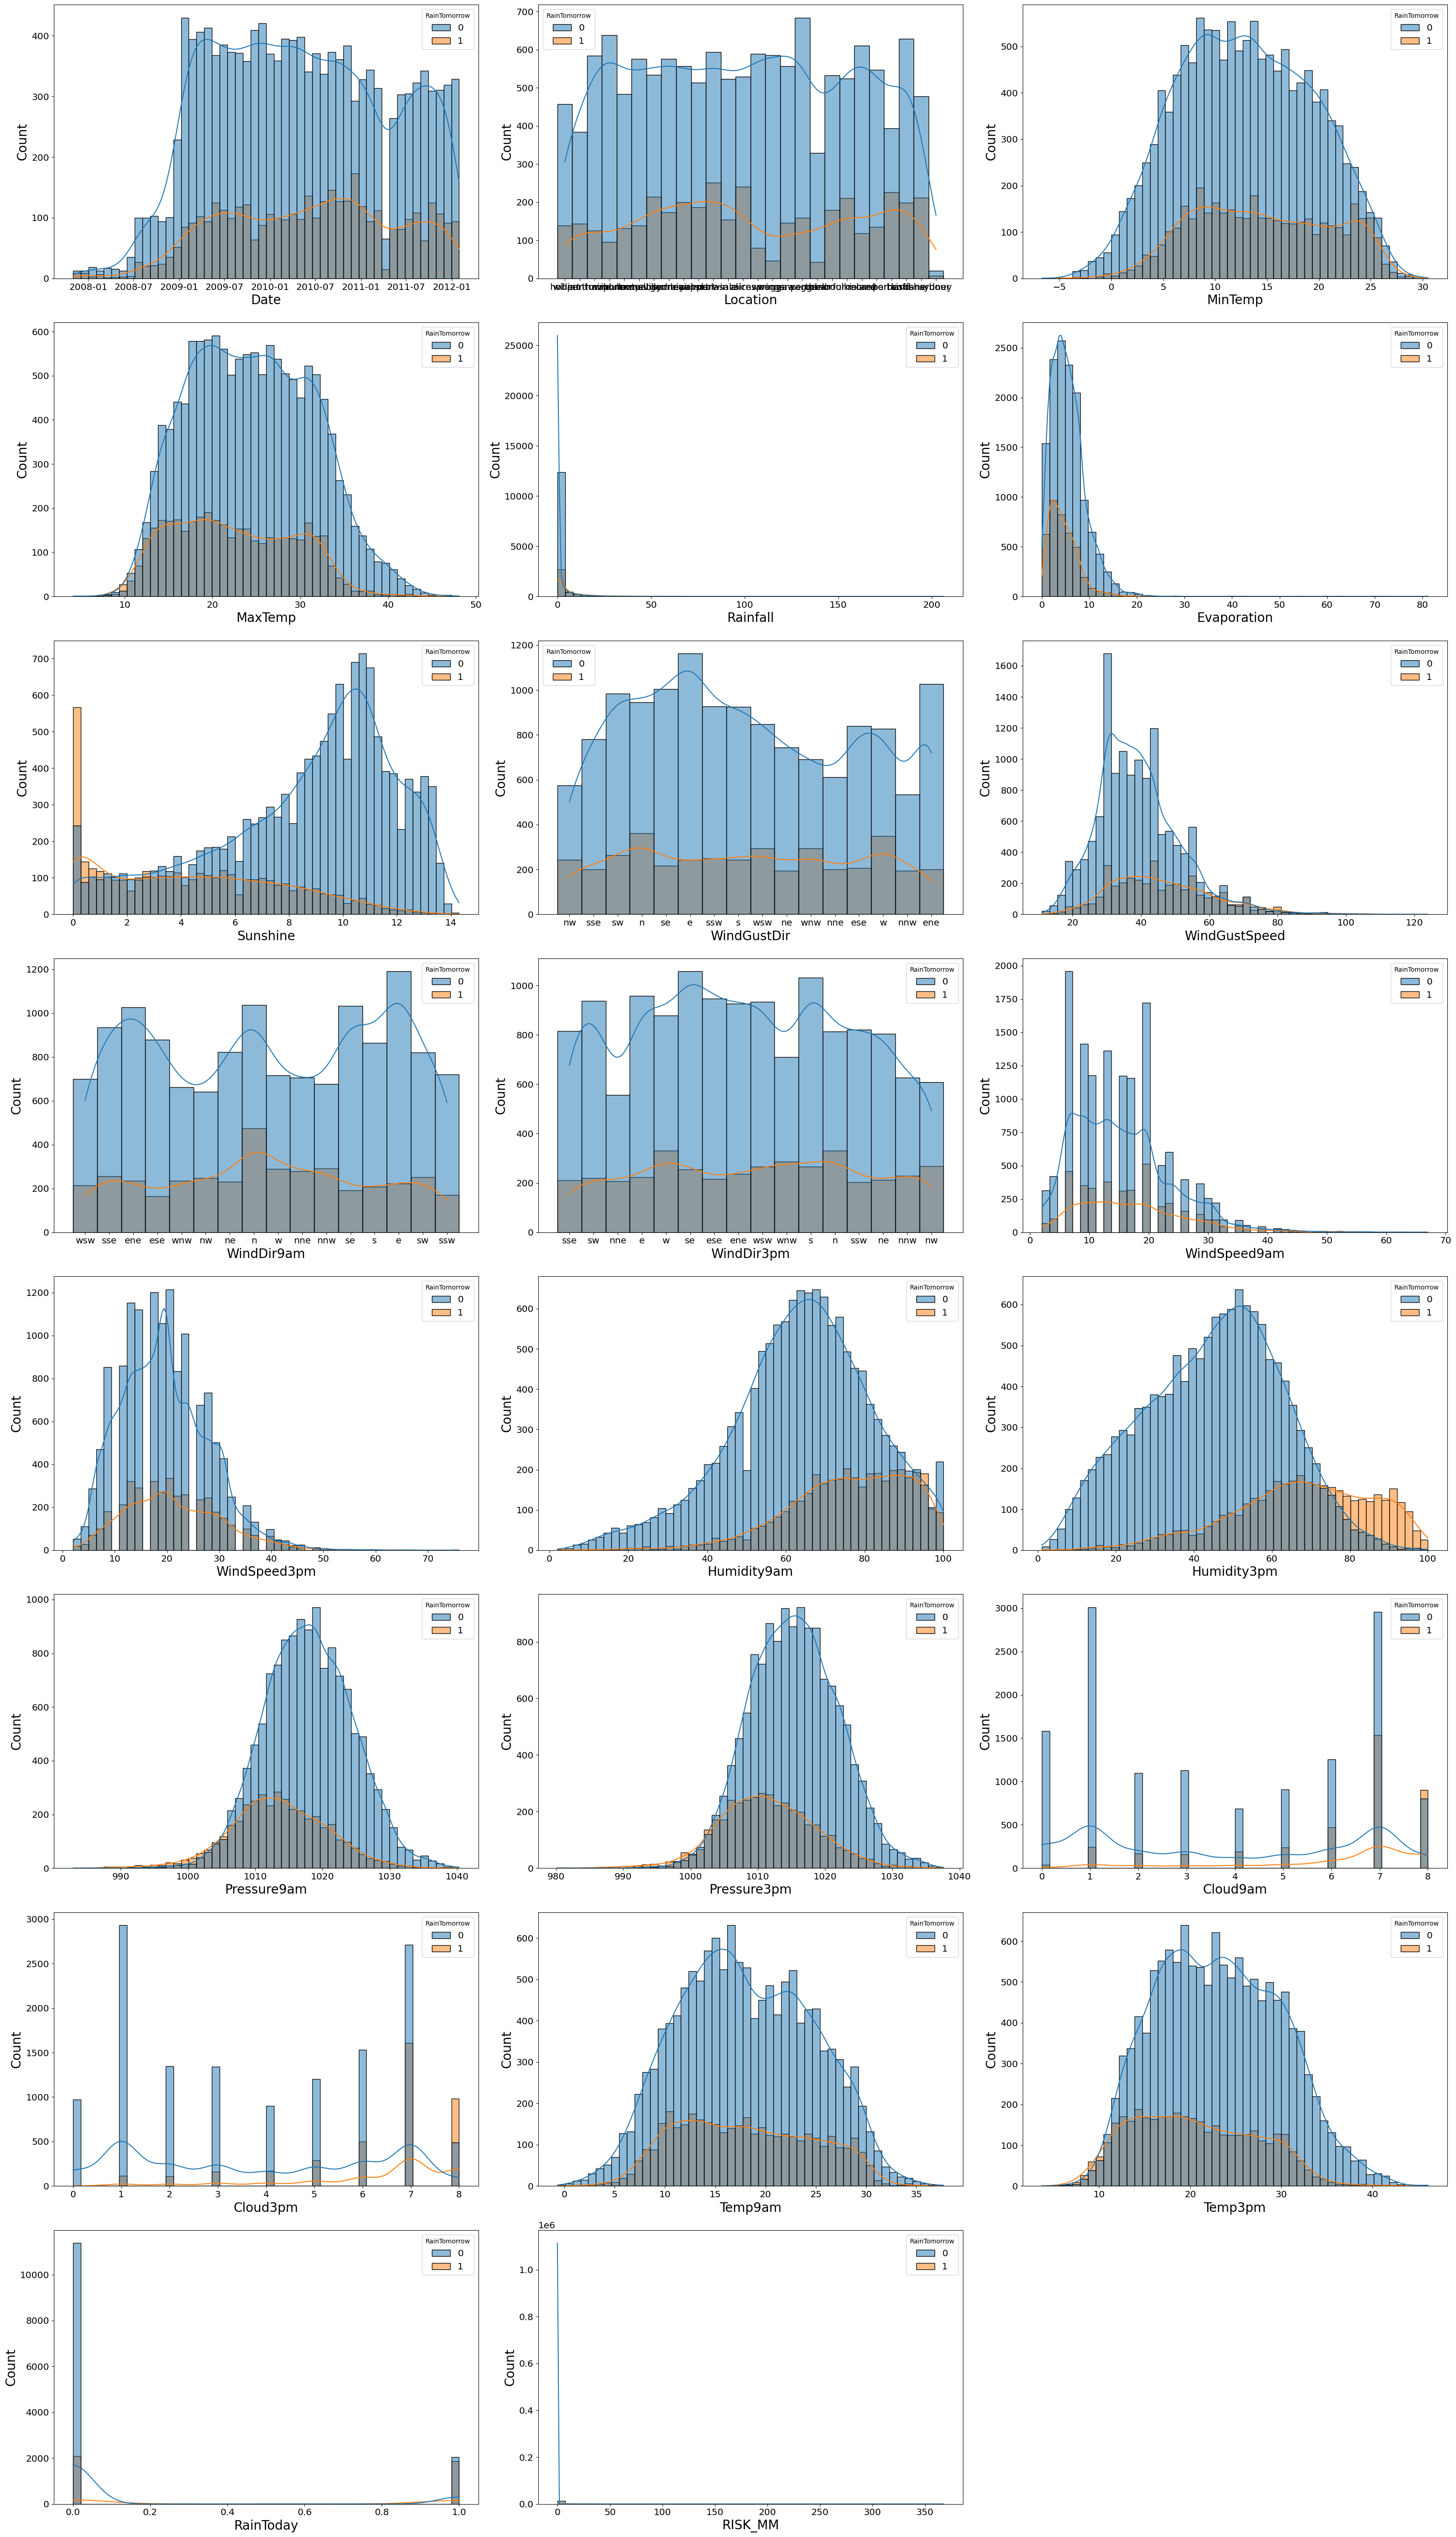

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(weather_df.shape[1] / num_cols) + 1

for index, col in enumerate(weather_df.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(weather_df, x=col, hue='RainTomorrow', kde=True, bins=50)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

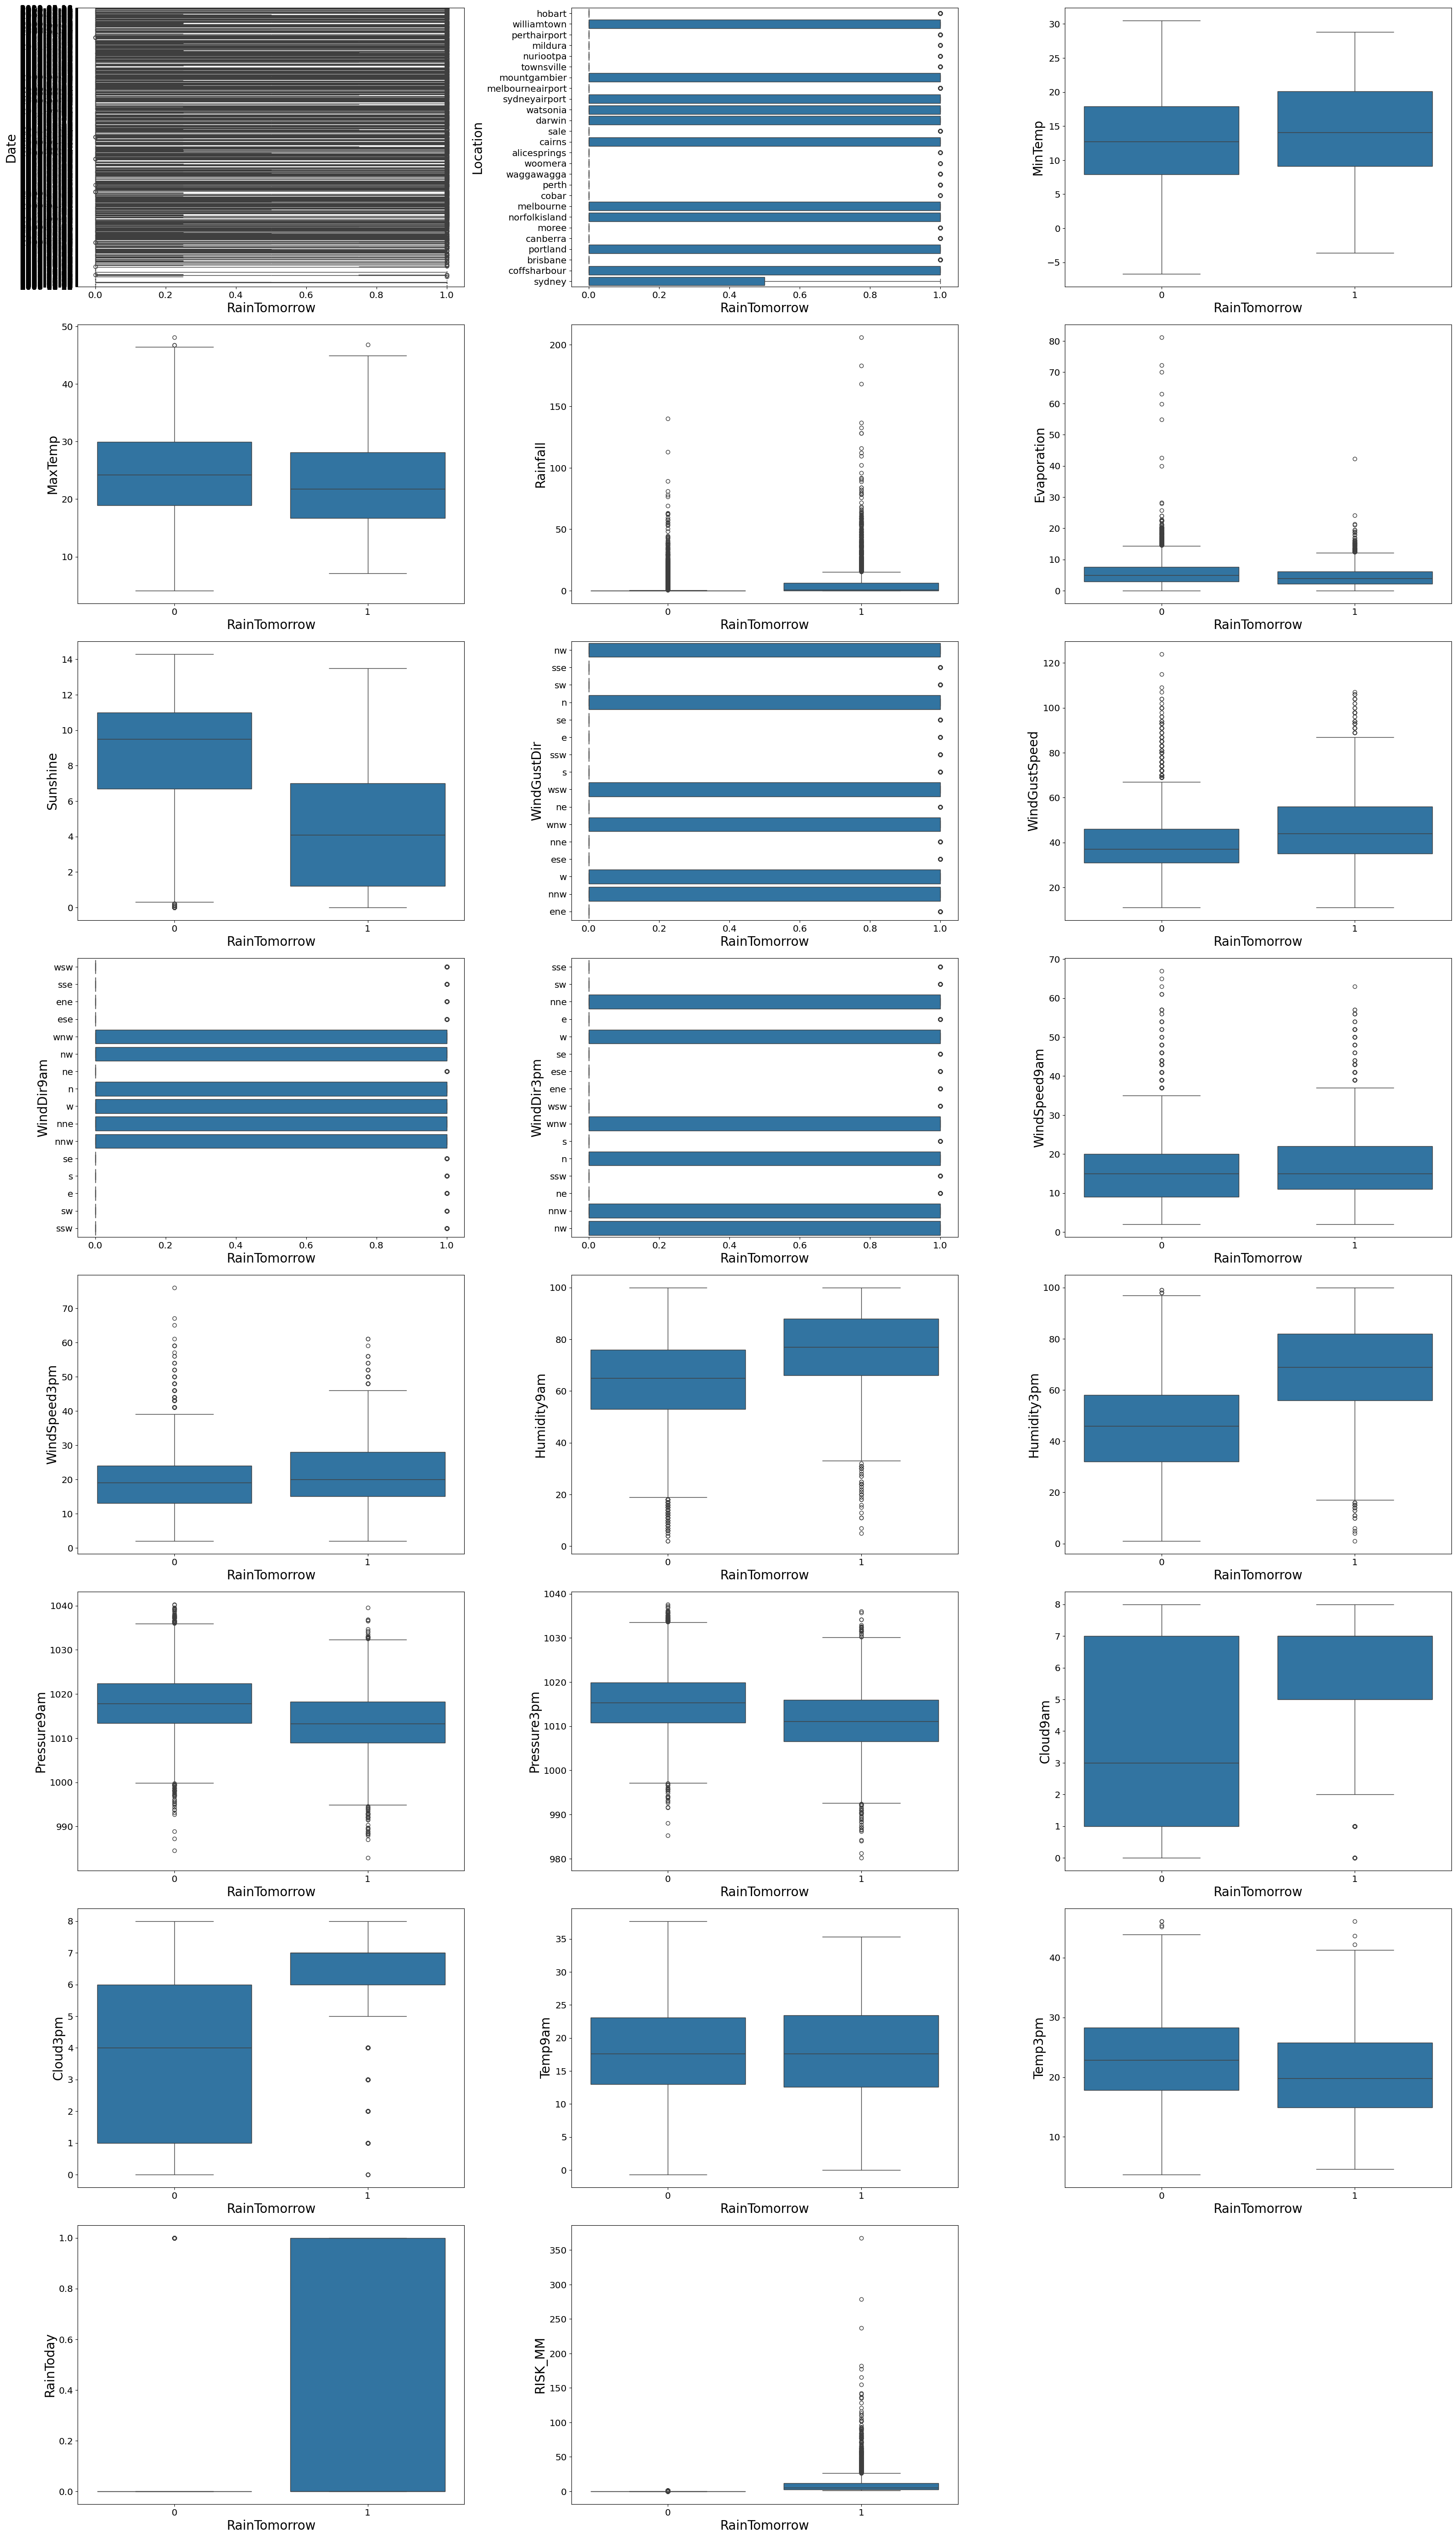

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(weather_df.shape[1] / num_cols) + 1

for index, col in enumerate(weather_df.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=weather_df, x='RainTomorrow', y=col)

    # Increase x-axis and y-axis title font size
    plt.xlabel('RainTomorrow', fontsize=20)
    plt.ylabel(col, fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
# **Q1.1.** Build a classification model using Decision Trees to predict the target variable `RainTomorrow` from the dataset.


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into features (X) and target variable (y)
X = weather_df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM']]
y = weather_df['RainTomorrow']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)




DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict the target variable on the test set
pruned_y_pred = clf.predict(X_test)

pruned_y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# **Q1.2.** Evaluate and discuss the model performance.

# Evaluating the model performance
accuracy = accuracy_score(y_test, pruned_y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, pruned_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pruned_y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2687
           1       1.00      1.00      1.00       789

    accuracy                           1.00      3476
   macro avg       1.00      1.00      1.00      3476
weighted avg       1.00      1.00      1.00      3476


Confusion Matrix:
[[2687    0]
 [   0  789]]


The model performance appears to be exceptionally good based on the provided metrics:

Accuracy: The accuracy score of 1.0 (or 100%) indicates that the model correctly predicted all instances in the test set, with no misclassifications.

Precision, Recall, and F1-score: For both classes (0 and 1), precision, recall, and F1-score are all perfect, showing values of 1.0. This means that for both classes, all instances predicted as positive are indeed positive (precision), all positive instances are correctly identified (recall), and the harmonic mean of precision and recall is also perfect (F1-score).

Confusion Matrix: The confusion matrix confirms the perfect performance, with all predictions falling along the diagonal, indicating that all predictions match the actual labels.

In summary, the model appears to perform flawlessly on the provided test data. However, such perfect performance could be a sign of overfitting, especially if the model has not been evaluated on unseen data or cross-validated. It's essential to verify the model's performance on new data to ensure its generalization capabilities. 

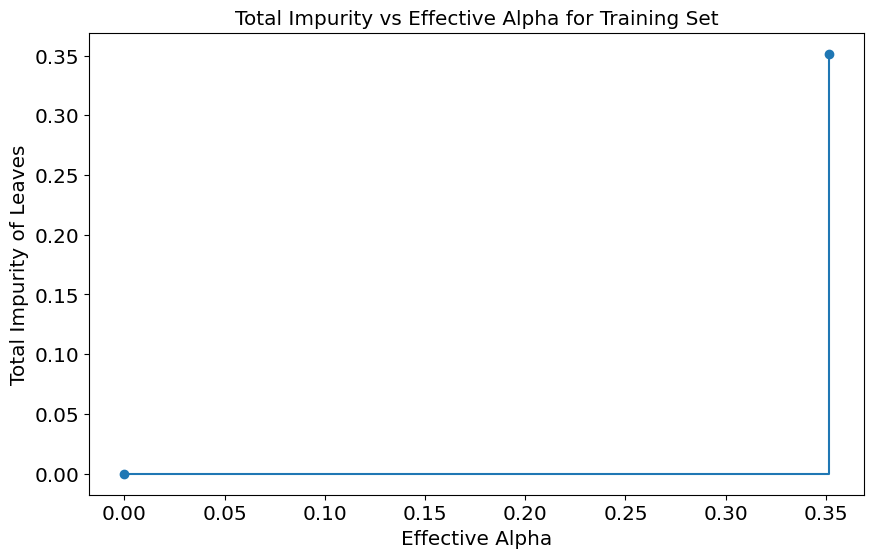

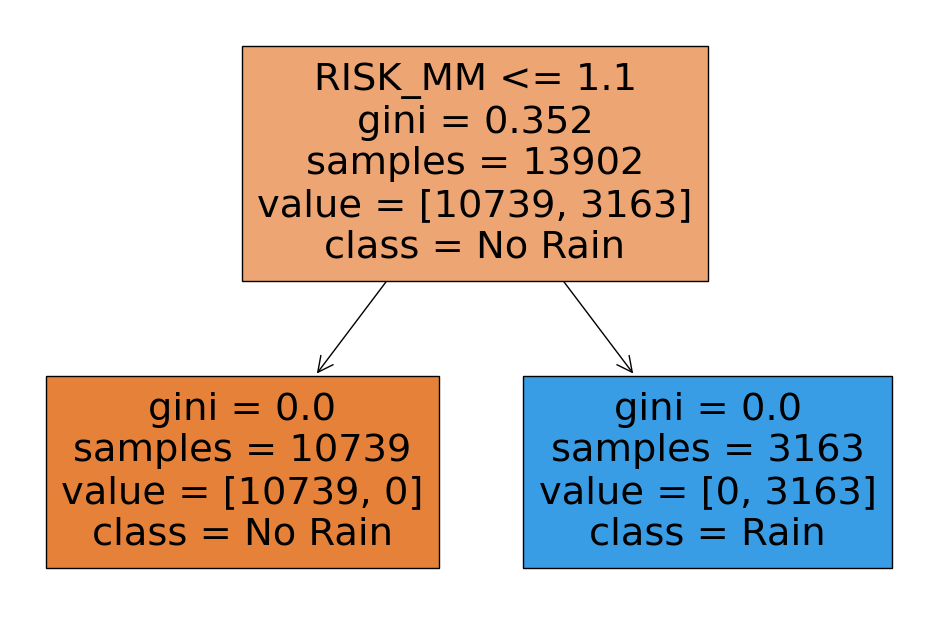

In [ ]:
# **Q1.3.** Use the Cost Complexity Pruning method to prune the decision tree to avoid overfitting. 

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
import numpy as np

# Compute the Cost Complexity Pruning Path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Visualize the Impurity-based Complexity Parameter (Alpha)
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Total Impurity vs Effective Alpha for Training Set")
plt.show()

# Prune the Tree
clfs = []
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_train, y_train)
    clfs.append(pruned_tree)

# Evaluate Pruned Trees using Cross-Validation
f1_scores = []
for clf in clfs:
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
    f1_scores.append(np.mean(scores))

# Select the Optimal Value of Alpha based on F1-score
optimal_alpha = ccp_alphas[np.argmax(f1_scores)]

# Train the Pruned Decision Tree with the Optimal Alpha
pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)

# Visualize the Pruned Tree
plt.figure(figsize=(12, 8))
plot_tree(pruned_tree, filled=True, feature_names=X_train.columns, class_names=['No Rain', 'Rain'])
plt.show()

In [ ]:
# **Q1.4.** Evaluate and discuss the model performance after the pruning.

# Predict the target variable on the test set using the Pruned Decision Tree
pruned_y_pred = pruned_tree.predict(X_test)

# Evaluating the model performance after pruning
accuracy = accuracy_score(y_test, pruned_y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, pruned_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pruned_y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2687
           1       1.00      1.00      1.00       789

    accuracy                           1.00      3476
   macro avg       1.00      1.00      1.00      3476
weighted avg       1.00      1.00      1.00      3476


Confusion Matrix:
[[2687    0]
 [   0  789]]


It seems that even after implementing cross-validation and using the Cost Complexity Pruning method to prune the decision tree, the model still achieves perfect performance. This suggests that the dataset may have characteristics that make it very easy for the decision tree model to learn and generalize well. However, it can also sometimes indicate issues such as data leakage, overfitting, or dataset imbalance.

In [ ]:
# **Q1.5.** Build a classification model using Random Forests to predict the target variable `RainTomorrow` from the dataset.

from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)
y_pred


array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# **Q1.6.** Evaluate and discuss the model performance in contrast to the previous models (before and after the pruning).

# Evaluate model performance
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2687
           1       1.00      1.00      1.00       789

    accuracy                           1.00      3476
   macro avg       1.00      1.00      1.00      3476
weighted avg       1.00      1.00      1.00      3476

Confusion Matrix:
[[2687    0]
 [   0  789]]
